In [0]:
%pip install nltk flair textblob dask

Python interpreter will be restarted.
Requirement already satisfied: nltk in /databricks/python3/lib/python3.8/site-packages (3.6.7)
Requirement already satisfied: flair in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (0.10)
Requirement already satisfied: textblob in /databricks/python3/lib/python3.8/site-packages (0.17.1)
Requirement already satisfied: dask in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (2022.2.0)
Requirement already satisfied: partd>=0.3.10 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from dask) (1.2.0)
Requirement already satisfied: cloudpickle>=1.1.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from dask) (2.0.0)
Requirement already satisfied: toolz>=0.8.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from dask) (0.11.2)
Requirement already satisfied: packaging>=20.0 in /databricks/python3/lib/python3.8/site-packages (from dask) (20.9)
Requirement already satisfied: fsspec>=0.6.0 in /databricks/python3/lib/python3.8/site-packages (from dask) (2022.1.0)
Requirement already satisfied: pyyaml>=5.3.1 in /databricks/python3/lib/python3.8/site-packages (from dask) (5.4.1)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging>=20.0->dask) (2.4.7)
Requirement already satisfied: locket in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from partd>=0.3.10->dask) (0.2.1)
Requirement already satisfied: segtok>=1.5.7 in /databricks/python3/lib/python3.8/site-packages (from flair) (1.5.11)
Requirement already satisfied: gdown==3.12.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (3.12.2)
Requirement already satisfied: torch!=1.8,>=1.5.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (1.10.2)
Requirement already satisfied: regex in /databricks/python3/lib/python3.8/site-packages (from flair) (2022.1.18)
Requirement already satisfied: wikipedia-api in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (0.5.4)
Requirement already satisfied: janome in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (0.4.1)
Requirement already satisfied: python-dateutil>=2.6.1 in /databricks/python3/lib/python3.8/site-packages (from flair) (2.8.1)
Requirement already satisfied: konoha<5.0.0,>=4.0.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (4.6.5)
Requirement already satisfied: transformers>=4.0.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (4.16.2)
Requirement already satisfied: scikit-learn>=0.21.3 in /databricks/python3/lib/python3.8/site-packages (from flair) (0.24.1)
Requirement already satisfied: tqdm>=4.26.0 in /databricks/python3/lib/python3.8/site-packages (from flair) (4.62.3)
Requirement already satisfied: gensim>=3.4.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (4.1.2)
Requirement already satisfied: langdetect in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a250-620c8927b4e2/lib/python3.8/site-packages (from flair) (1.0.9)
Requirement already satisfied: matplotlib>=2.2.3 in /databricks/python3/lib/python3.8/site-packages (from flair) (3.4.2)
Requirement already satisfied: lxml in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ff134dd3-04b3-463e-a

# Load Dask DF

In [0]:
import datetime
today = datetime.datetime.today().strftime("%Y-%m-%d")
path = f"s3://REDACTED/orbl/twint/amazon/processed_not_labeled/dt={today}/tweets.csv"

In [0]:
import multiprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dask.dataframe as dd
pd.options.mode.chained_assignment = None  # default='warn'

tweets_df = pd.read_csv(path)
tweets_df = dd.from_pandas(tweets_df, npartitions=4*multiprocessing.cpu_count())

/databricks/python/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
 has_raised = await self.run_ast_nodes(code_ast.body, cell_name,

In [0]:
%sh python -m nltk.downloader all

/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
 warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Package abc is already up-to-date!
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Package alpino is already up-to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger is already up-
[nltk_data] | to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger_ru to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger_ru is already
[nltk_data] | up-to-date!
[nltk_data] | Downloading package basque_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package basque_grammars is already up-to-date!
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package biocreative_ppi is already up-to-date!
[nltk_data] | Downloading package bllip_wsj_no_aux to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package bllip_wsj_no_aux is already up-to-date!
[nltk_data] | Downloading package book_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package book_grammars is already up-to-date!
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Package brown is already up-to-date!
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Package brown_tei is already up-to-date!
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Package cess_cat is already up-to-date!
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Package cess_esp is already up-to-date!
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Package chat80 is already up-to-date!
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package city_database is already up-to-date!
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package comparative_sentences is already up-to-
[nltk_data] | date!
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Package comtrans is already up-to-date!
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Package conll2000 is already up-to-date!
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Package conll2002 is already up-to-date!
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Package conll2007 is already up-to-date!
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Package crubadan is already up-to-date!
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package dependency_treebank is already up-to-date!
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Package dolch is already up-to-date!
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package europarl_raw is already up-to-date!
[nltk_data] | Downloading package extended_omw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package extended_omw is already up-to-date!
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Package floresta is already up-to-date!
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v15 is already up-to-date!
[nltk_data] | Downloading package framenet_v17 to
[nltk_data] | /root/nltk_data...
[nltk_data]

### NLTK Sentiment Model

In [0]:
example_tweet = "@spikepoint The one thing I hate about Amazon music is that they don't stream their Atmos music through TVs like tidal does but it's also the least expensive way to get spacial audio remixes of music so you win some lose some  Also their app is HORRIBLE. Albums will just randomly miss songs"

In [0]:
# NLTK’s Vader sentiment analysis tool uses a bag of words approach - https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
from nltk.sentiment import SentimentIntensityAnalyzer
class NLTKSentiment:
  sia = SentimentIntensityAnalyzer()
  
  @classmethod
  def get_nltk_sentiment(cls,
                         tweet: str) -> float:
    return cls.sia.polarity_scores(tweet)["compound"]
  
  @classmethod
  def is_negative_sentiment(cls,
                            tweet: str) -> bool:
    return cls.get_nltk_sentiment(tweet) < 0
    
# https://realpython.com/python-nltk-sentiment-analysis/

print(NLTKSentiment.get_nltk_sentiment(example_tweet))
print(NLTKSentiment.is_negative_sentiment(example_tweet))

-0.7124
True

### TextBlob Sentiment Model

In [0]:
# https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
from textblob import TextBlob

class TextBlobSentiment:
  
  @classmethod
  def get_textblob_sentiment(cls,
                             tweet: str):
    return TextBlob(example_tweet).sentiment
  
  @classmethod
  def is_negative_sentiment(cls,
                            tweet: str) -> bool:
    return cls.get_textblob_sentiment(tweet).polarity < 0

print(TextBlobSentiment.get_textblob_sentiment(example_tweet).polarity)
print(TextBlobSentiment.is_negative_sentiment(example_tweet))

-0.3833333333333333
True

### Flair Sentiment Model

In [0]:
# # https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
# !pip3 install flair
import flair

class FlairSentiment:  
  flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
  
  @classmethod
  def get_flair_sentiment(cls,
                          tweet: str):
    s = flair.data.Sentence(example_tweet)
    cls.flair_sentiment.predict(s)
    total_sentiment = s.labels[0].to_dict()
    return total_sentiment
  
  @classmethod
  def is_negative_sentiment(cls,
                            tweet: str) -> bool:
    return True if cls.get_flair_sentiment(tweet)["value"] == "NEGATIVE" else False
  
print(FlairSentiment.get_flair_sentiment(example_tweet))
print(FlairSentiment.is_negative_sentiment(example_tweet))

2022-02-19 17:17:31,066 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt
{'value': 'NEGATIVE', 'confidence': 0.9075034260749817}
True

### Advanced NLTK Sentiment Model

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

import re, string, random

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

def train_nltk_advanced_sentiment():
    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

#     nltk_advanced_classifier = NaiveBayesClassifier.train(train_data)
    nltk_advanced_classifier = NaiveBayesClassifier.train(dataset)

#     print("Accuracy is:", classify.accuracy(nltk_advanced_classifier, test_data))

    print(nltk_advanced_classifier.show_most_informative_features(10))
    return nltk_advanced_classifier
    
nltk_advanced_classifier = train_nltk_advanced_sentiment()

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
Most Informative Features
 :( = True Negati : Positi = 2949.0 : 1.0
 :) = True Positi : Negati = 1416.6 : 1.0
 follower = True Positi : Negati = 31.0 : 1.0
 bam = True Positi : Negati = 29.7 : 1.0
 sad = True Negati : Positi = 26.8 : 1.0
 x15 = True Negati : Positi = 23.7 : 1.0
 community = True Positi : Negati = 21.0 : 1.0
 glad = True Positi : Negati = 17.4 : 1.0
 ugh = True Negati : Positi = 17.0 : 1.0
 goodnight = True Positi : Negati = 15.7 : 1.0
None

In [0]:
class NLTKAdvanceSentiment():
  
  @staticmethod
  def preprocess_text(text: str):
    return remove_noise(word_tokenize(text))
  
  @classmethod
  def classify(cls,
               text: str):
    custom_tokens = cls.preprocess_text(text)
    return nltk_advanced_classifier.classify(dict([token, True] for token in custom_tokens))
  
  @classmethod
  def is_negative_sentiment(cls,
                            text: str) -> bool:
    return cls.classify(text) == "Negative"
  
print(NLTKAdvanceSentiment.classify(example_tweet))
print(NLTKAdvanceSentiment.is_negative_sentiment(example_tweet))

Negative
True

In [0]:
# ### out of memory 
# tweets_df["is_negative_nltk_simple"] = tweets_df.tweet.apply(lambda tweet: NLTKSentiment.is_negative_sentiment(tweet))
# tweets_df["is_negative_text_blob"] = tweets_df.tweet.apply(lambda tweet: TextBlobSentiment.is_negative_sentiment(tweet))
# tweets_df["is_negative_flair_simple"] = tweets_df.tweet.apply(lambda tweet: FlairSentiment.is_negative_sentiment(tweet))
# tweets_df["is_negative_nltk_advanced"] = tweets_df.tweet.apply(lambda tweet: NLTKAdvanceSentiment.is_negative_sentiment(tweet))

tweets_df['is_negative_nltk_simple'] = tweets_df\
  .tweet.map_partitions(lambda row: \
                        row.apply(lambda tweet: \
                                  NLTKSentiment.is_negative_sentiment(tweet)), 
                        meta=('is_negative_nltk_simple', 
                              'bool'))
tweets_df['is_negative_text_blob'] = tweets_df\
  .tweet.map_partitions(lambda row: \
                        row.apply(lambda tweet: \
                                  NLTKSentiment.is_negative_sentiment(tweet)), 
                        meta=('is_negative_text_blob', 
                              'bool'))
tweets_df['is_negative_flair_simple'] = tweets_df\
  .tweet.map_partitions(lambda row: \
                        row.apply(lambda tweet: \
                                  NLTKSentiment.is_negative_sentiment(tweet)), 
                        meta=('is_negative_flair_simple', 
                              'bool'))
tweets_df['is_negative_nltk_advanced'] = tweets_df\
  .tweet.map_partitions(lambda row: \
                        row.apply(lambda tweet: \
                                  NLTKSentiment.is_negative_sentiment(tweet)), 
                        meta=('is_negative_nltk_advanced', 
                              'bool'))

# Save results

In [0]:
path = f"s3://REDACTED/orbl/twint/amazon/labeled/dt={today}/*"
paths = tweets_df.to_csv(path, compute=True, index=False)
paths = ["s3://" + path for path in paths]

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-739010550420044> in <module> 
 2 date = "2022-02-18" 
 3 path = f"s3://activefence-user/orbl/twint/amazon/labeled/dt={date}/*" 
 ----> 4 paths = tweets_df . to_csv ( path , compute = True , index = False ) 
 5 paths = [ "s3://" + path for path in paths ] 

 NameError : name 'tweets_df' is not defined

In [0]:
base_path = "s3://REDACTED/orbl/twint/amazon/labeled/dt=2022-02-19/"
paths = [base_path + "{0:0=2d}".format(i) for i in list(range(32))]

In [0]:
df = pd.read_csv(paths[0])
for path in paths[1:]:
  temp_df = pd.read_csv(path)
  df = pd.concat([df, temp_df], axis=0)
df = df.drop_duplicates(subset=["id"]).reset_index(drop=True)

In [0]:
df["n_negative"] = sum([df.is_negative_nltk_simple,
                        df.is_negative_text_blob,
                        df.is_negative_flair_simple,
                        df.is_negative_nltk_advanced])

In [0]:
df.display()

id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,query,type,modified_date,is_negative_nltk_simple,is_negative_text_blob,is_negative_flair_simple,is_negative_nltk_advanced,n_negative
1485344539074301957,1485342419159855109,1.642968709E12,2022-01-23 20:11:49,0,null,@spikepoint The one thing I hate about Amazon music is that they don't stream their Atmos music through TVs like tidal does but it's also the least expensive way to get spacial audio remixes of music so you win some lose some Also their app is HORRIBLE. Albums will just randomly miss songs,en,[],[],1269508676823519233,1269508676823519233,suburbancoyotee,theresa!,7,20,https://twitter.com/suburbancoyotee/status/1485344539074301957,[],[],0,null,false,0,1,0,null,amazon app,null,null,null,null,null,null,"[{'screen_name': 'spikepoint', 'name': 'Capt. Spike 2099', 'id': '28051036'}]",null,null,null,null,amazon app,application,2022-01-23,true,true,true,true,4
1485343775241158662,1481322928662884364,1.642968527E12,2022-01-23 20:08:47,0,null,"@graanhay Para que podamos guiarte de la mejor manera, ¿podrías confirmar si la alerta que nos compartes se muestra al acceder a la app de Prime Video o al intentar visualizar el contenido desde la plataforma? -Kat",es,[],[],85741735,85741735,AmazonHelp,Amazon Help,7,20,https://twitter.com/AmazonHelp/status/1485343775241158662,[],[],0,null,false,0,1,0,null,amazon app,null,null,null,null,null,null,"[{'screen_name': 'graanhay', 'name': 'Gra 🇦🇷🇦🇷', 'id': '1427811495048617989'}]",null,null,null,null,amazon app,application,2022-01-23,false,false,false,false,0
1485343321883090949,1481322928662884364,1.642968418E12,2022-01-23 20:06:58,0,null,"@AmazonHelp La app está en el servicio de Telecentro,,, quiero ver Amazon desde la TV,, que solución me dan,?",es,[],[],1427811495048617989,1427811495048617989,graanhay,Gra 🇦🇷🇦🇷,7,20,https://twitter.com/graanhay/status/1485343321883090949,[],[],0,null,false,0,1,0,null,amazon app,null,null,null,null,null,null,"[{'screen_name': 'AmazonHelp', 'name': 'Amazon Help', 'id': '85741735'}]",null,null,null,null,amazon app,application,2022-01-23,false,false,false,false,0
1485342829924655104,1485342829924655104,1.642968301E12,2022-01-23 20:05:01,0,null,Check out @RelaxmeOnline Sleep Meditation By Jason Stephenson #Amazon #FireTV and #FireTablet app #SleepMeditation #SleepMusic #MeditationMusic #CalmingMusic #RelaxingMusic #SoothingMusic https://t.co/9VFlLhsCth,en,"['amazon', 'firetv', 'firetablet', 'sleepmeditation', 'sleepmusic', 'meditationmusic', 'calmingmusic', 'relaxingmusic', 'soothingmusic']",[],942220455523491840,942220455523491840,SeeOTTerTV_bot,See Otter TV Updates,7,20,https://twitter.com/SeeOTTerTV_bot/status/1485342829924655104,['https://www.amazon.com/dp/B076MMZ2MQ'],[],0,null,false,0,0,0,null,amazon app,null,null,null,null,null,null,[],null,null,null,null,amazon app,application,2022-01-23,false,false,false,false,0
1485342825927811074,1485342825927811074,1.6429683E12,2022-01-23 20:05:00,0,null,androidアプリ宅建過去問まとめ https://t.co/pn1XMd7eMP (GooglePlay) https://t.co/0jPjlJXJjF (amazon) https://t.co/tGMC0Uv7re,ja,[],[],433270374,433270374,takatsuma_app,Takatsuma,7,20,https://twitter.com/takatsuma_app/status/1485342825927811074,"['http://ow.ly/vvKHU', 'http://ow.ly/vtepI', 'http://ow.ly/vkTBl']",[],0,null,false,0,0,0,null,amazon app,null,null,null,null,null,null,[],null,null,null,null,amazon app,application,2022-01-23,false,false,false,false,0
1485341576591249408,1485341576591249408,1.642968002E12,2022-01-23 20:00:02,0,null,Biberzon statt Amazon oder per App Biberach kennenlernen: Hochschulstudenten haben ein halbes Jahr Konzepte für Biberach in und nach der Pandemie entwickelt. https://t.co/xY6SWRpfGx,de,[],[],179887598,179887598,SZ_Biberach,Schwäbische Bib

# Filter only negative tweets
* negative tweet is denoted by a 3+ models that indicate it to be negative

In [0]:
n_total_tweets = df.shape[0]
df = df[df["n_negative"] > 2]\
  .reset_index(drop=True)
n_negative_tweets = df.shape[0]
print("Total number of tweets: ", n_total_tweets)
print("Total number of negative tweets: ", n_negative_tweets)
print("Total number of non-negative tweets: ", n_total_tweets - n_negative_tweets)

Total number of tweets: 36178
Total number of negative tweets: 6485
Total number of non-negative tweets: 29693

# Compare number of negative tweets by platform (Website/Application)

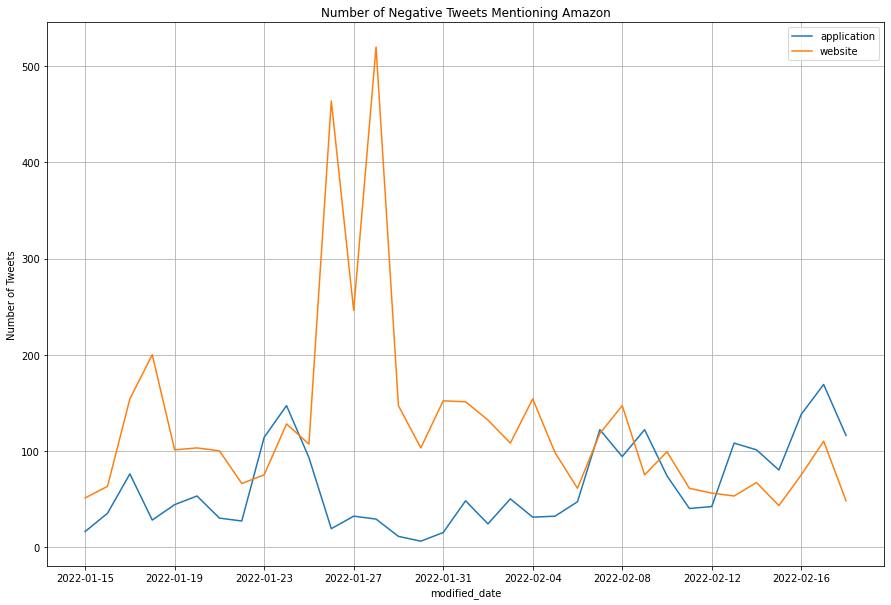

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

count_df = df.groupby(["type", "modified_date"]).size()
count_df = count_df.reset_index().rename(columns={0:"count"})

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x="modified_date", y="count", hue="type", data=count_df, ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.ylabel('Number of Tweets')
plt.title('Number of Negative Tweets Mentioning Amazon')
plt.legend(fontsize="x-large")
plt.grid(True)

Out[64]:

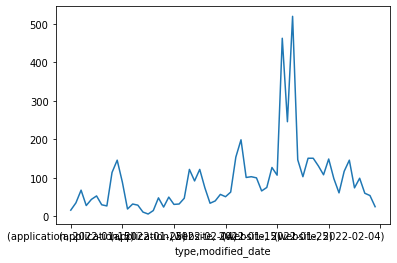

<AxesSubplot:xlabel='type,modified_date'>

In [0]:
df.groupby(["type", "modified_date"]).agg("count")["tweet"].plot(kind="line", x="type")

In [0]:
df.n_negative.unique()

Out[36]: array([4, 0])

In [0]:
cols = ["tweet", "is_negative_nltk_simple", "is_negative_text_blob", "is_negative_flair_simple", "is_negative_nltk_advanced"]
df[df["is_negative_nltk_simple"] == True][cols]

In [0]:
tweets_df[["tweet", "is_negative_nltk_simple", "is_negative_text_blob", "is_negative_flair_simple", "is_negative_nltk_advanced"]]

In [0]:
path = "s3://activfence-user/orbl/twint/amazon/predictions/dt=2022-02-10/predictions.csv"
tweets_df.to_csv(path, index=False)

In [0]:
# https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671
# BERT